<a href="https://colab.research.google.com/github/Legajo/Colab-Notebooks/blob/main/HW1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================================
# PROMPT 1: Install and Import Required Libraries
# ============================================

# Install yfinance if not already installed
!pip install yfinance -q

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# ============================================
# PROMPT 2: Define Index Tickers and Download Data
# ============================================

# Define the indexes and their tickers
indexes = {
    'United States (S&P 500)': '^GSPC',
    'China (Shanghai)': '000001.SS',
    'Hong Kong (Hang Seng)': '^HSI',
    'Australia (ASX 200)': '^AXJO',
    'India (Nifty 50)': '^NSEI',
    'Canada (TSX)': '^GSPTSE',
    'Germany (DAX)': '^GDAXI',
    'United Kingdom (FTSE 100)': '^FTSE',
    'Japan (Nikkei 225)': '^N225',
    'Mexico (IPC)': '^MXX',
    'Brazil (Ibovespa)': '^BVSP'
}

# Download data for the YTD period
start_date = '2025-01-01'
end_date = '2025-05-01'

print(f"Downloading data from {start_date} to {end_date}...\n")

# Download all data
data = yf.download(
    tickers=list(indexes.values()),
    start=start_date,
    end=end_date,
    progress=False
)

print("Data downloaded successfully!")
print(f"Data shape: {data.shape}")


/tmp/ipython-input-1315818878.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Data downloaded successfully!
Data shape: (87, 55)


In [3]:

# ============================================
# PROMPT 3: Calculate YTD Returns for Each Index
# ============================================

# Extract closing prices
close_prices = data['Close']

# Calculate YTD returns
ytd_returns = {}

for name, ticker in indexes.items():
    try:
        # Get the first and last valid prices
        prices = close_prices[ticker].dropna()

        if len(prices) > 0:
            first_price = prices.iloc[0]
            last_price = prices.iloc[-1]

            # Calculate percentage return
            ytd_return = ((last_price - first_price) / first_price) * 100
            ytd_returns[name] = ytd_return

            print(f"{name:35} | YTD Return: {ytd_return:+.2f}%")
        else:
            print(f"{name:35} | No data available")
            ytd_returns[name] = None
    except Exception as e:
        print(f"{name:35} | Error: {e}")
        ytd_returns[name] = None



United States (S&P 500)             | YTD Return: -5.10%
China (Shanghai)                    | YTD Return: +0.50%
Hong Kong (Hang Seng)               | YTD Return: +12.72%
Australia (ASX 200)                 | YTD Return: -0.91%
India (Nifty 50)                    | YTD Return: +2.49%
Canada (TSX)                        | YTD Return: -0.23%
Germany (DAX)                       | YTD Return: +12.35%
United Kingdom (FTSE 100)           | YTD Return: +2.84%
Japan (Nikkei 225)                  | YTD Return: -8.30%
Mexico (IPC)                        | YTD Return: +13.05%
Brazil (Ibovespa)                   | YTD Return: +12.44%


In [4]:


# ============================================
# PROMPT 4: Compare Performance vs S&P 500
# ============================================

# Get S&P 500 return
sp500_return = ytd_returns['United States (S&P 500)']

print(f"\n{'='*60}")
print(f"S&P 500 YTD Return: {sp500_return:+.2f}%")
print(f"{'='*60}\n")

# Count how many indexes outperformed the S&P 500
outperformers = []
underperformers = []

for name, ytd_return in ytd_returns.items():
    if name != 'United States (S&P 500)' and ytd_return is not None:
        if ytd_return > sp500_return:
            outperformers.append((name, ytd_return))
            print(f"✓ {name:35} | {ytd_return:+.2f}% (Better by {ytd_return - sp500_return:+.2f}%)")
        else:
            underperformers.append((name, ytd_return))

print(f"\n{'='*60}")
print(f"ANSWER: {len(outperformers)} out of 10 indexes outperformed the S&P 500")
print(f"{'='*60}")




S&P 500 YTD Return: -5.10%

✓ China (Shanghai)                    | +0.50% (Better by +5.61%)
✓ Hong Kong (Hang Seng)               | +12.72% (Better by +17.82%)
✓ Australia (ASX 200)                 | -0.91% (Better by +4.19%)
✓ India (Nifty 50)                    | +2.49% (Better by +7.59%)
✓ Canada (TSX)                        | -0.23% (Better by +4.88%)
✓ Germany (DAX)                       | +12.35% (Better by +17.45%)
✓ United Kingdom (FTSE 100)           | +2.84% (Better by +7.95%)
✓ Mexico (IPC)                        | +13.05% (Better by +18.15%)
✓ Brazil (Ibovespa)                   | +12.44% (Better by +17.54%)

ANSWER: 9 out of 10 indexes outperformed the S&P 500


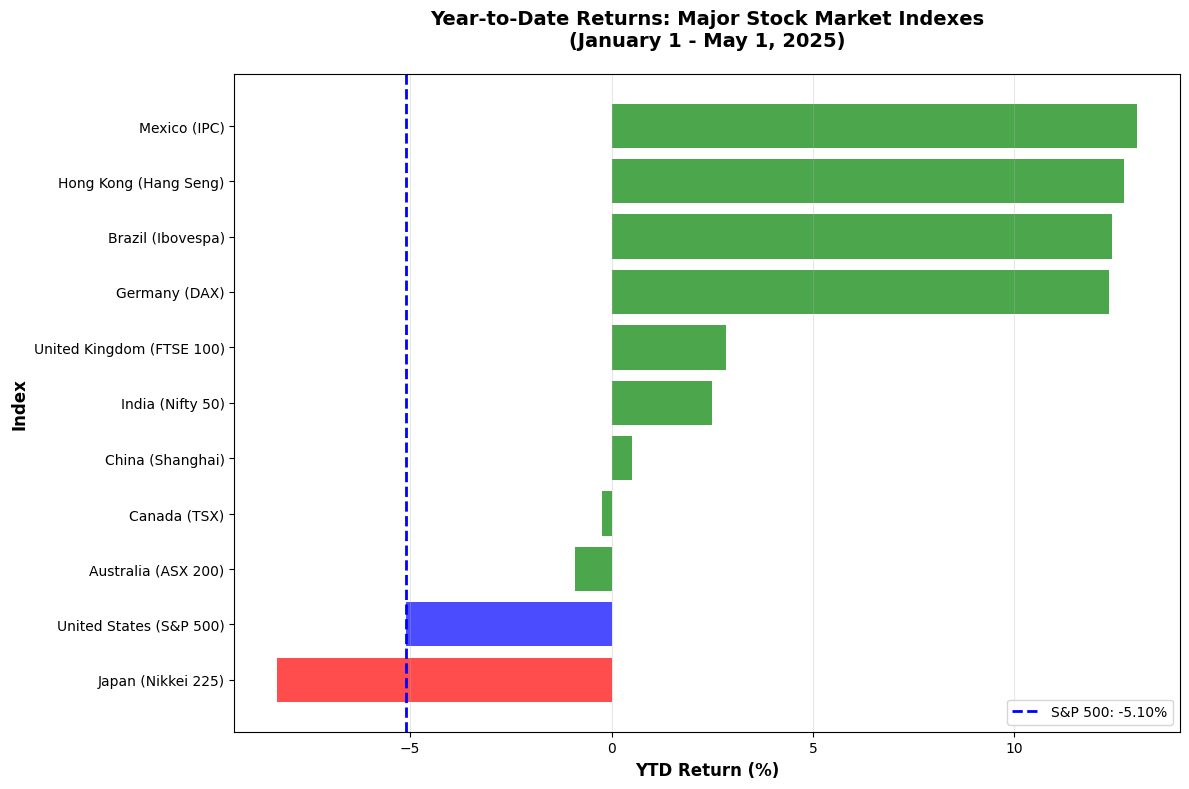


SUMMARY STATISTICS
Best Performer: Mexico (IPC) (+13.05%)
Worst Performer: Japan (Nikkei 225) (-8.30%)
Average Return: +3.80%
Median Return: +2.49%


In [5]:


# ============================================
# PROMPT 5: Create Visualization
# ============================================

# Prepare data for visualization
results_df = pd.DataFrame([
    {'Index': name, 'YTD Return (%)': ret}
    for name, ret in ytd_returns.items() if ret is not None
]).sort_values('YTD Return (%)', ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
colors = ['red' if ret < sp500_return else 'green'
          for ret in results_df['YTD Return (%)'].values]
colors[list(results_df['Index']).index('United States (S&P 500)')] = 'blue'

plt.barh(results_df['Index'], results_df['YTD Return (%)'], color=colors, alpha=0.7)
plt.axvline(x=sp500_return, color='blue', linestyle='--', linewidth=2, label=f'S&P 500: {sp500_return:.2f}%')
plt.xlabel('YTD Return (%)', fontsize=12, fontweight='bold')
plt.ylabel('Index', fontsize=12, fontweight='bold')
plt.title('Year-to-Date Returns: Major Stock Market Indexes\n(January 1 - May 1, 2025)',
          fontsize=14, fontweight='bold', pad=20)
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Best Performer: {results_df.iloc[-1]['Index']} ({results_df.iloc[-1]['YTD Return (%)']:+.2f}%)")
print(f"Worst Performer: {results_df.iloc[0]['Index']} ({results_df.iloc[0]['YTD Return (%)']:+.2f}%)")
print(f"Average Return: {results_df['YTD Return (%)'].mean():+.2f}%")
print(f"Median Return: {results_df['YTD Return (%)'].median():+.2f}%")
print("="*60)



In [6]:


# ============================================
# PROMPT 6: Create Detailed Results Table
# ============================================

# Create a comprehensive results table
results_table = results_df.copy()
results_table['Rank'] = range(len(results_table), 0, -1)
results_table['vs S&P 500'] = results_table['YTD Return (%)'] - sp500_return
results_table['Outperformed S&P 500'] = results_table['YTD Return (%)'] > sp500_return

# Reorder columns
results_table = results_table[['Rank', 'Index', 'YTD Return (%)', 'vs S&P 500', 'Outperformed S&P 500']]
results_table = results_table.sort_values('Rank')

print("\nDETAILED RESULTS TABLE")
print("="*100)
print(results_table.to_string(index=False))
print("="*100)

# Export to CSV (optional)
results_table.to_csv('ytd_index_performance_2025.csv', index=False)
print("\nResults exported to 'ytd_index_performance_2025.csv'")




DETAILED RESULTS TABLE
 Rank                     Index  YTD Return (%)  vs S&P 500  Outperformed S&P 500
    1              Mexico (IPC)       13.049444   18.152745                  True
    2     Hong Kong (Hang Seng)       12.720018   17.823319                  True
    3         Brazil (Ibovespa)       12.438710   17.542010                  True
    4             Germany (DAX)       12.346378   17.449679                  True
    5 United Kingdom (FTSE 100)        2.842590    7.945891                  True
    6          India (Nifty 50)        2.490424    7.593724                  True
    7          China (Shanghai)        0.504817    5.608118                  True
    8              Canada (TSX)       -0.226126    4.877175                  True
    9       Australia (ASX 200)       -0.914500    4.188800                  True
   10   United States (S&P 500)       -5.103301    0.000000                 False
   11        Japan (Nikkei 225)       -8.297931   -3.194630               

In [7]:


# ============================================
# PROMPT 7: Download Historical Data for Long-Term Analysis
# ============================================

print("\n" + "="*60)
print("LONG-TERM PERFORMANCE ANALYSIS")
print("="*60)

# Calculate dates for 3, 5, and 10 year periods
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

end_date_long = '2025-05-01'
periods = {
    '3-Year': '2022-05-01',
    '5-Year': '2020-05-01',
    '10-Year': '2015-05-01'
}

print("\nDownloading historical data for long-term analysis...")
print("This may take a moment...\n")

# Download data for each period
historical_data = {}
for period_name, start in periods.items():
    print(f"Downloading {period_name} data ({start} to {end_date_long})...")
    hist_data = yf.download(
        tickers=list(indexes.values()),
        start=start,
        end=end_date_long,
        progress=False
    )
    historical_data[period_name] = hist_data

print("\nHistorical data downloaded successfully!")



LONG-TERM PERFORMANCE ANALYSIS

This may take a moment...



/tmp/ipython-input-1386237924.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist_data = yf.download(


/tmp/ipython-input-1386237924.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist_data = yf.download(


/tmp/ipython-input-1386237924.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist_data = yf.download(



Historical data downloaded successfully!


In [8]:

# ============================================
# PROMPT 8: Calculate Long-Term Returns
# ============================================

print("\n" + "="*60)
print("CALCULATING LONG-TERM RETURNS")
print("="*60 + "\n")

# Calculate returns for each period
long_term_returns = {}

for period_name, hist_data in historical_data.items():
    print(f"\n{period_name} Returns:")
    print("-" * 60)

    period_returns = {}
    close_prices_period = hist_data['Close']

    for name, ticker in indexes.items():
        try:
            prices = close_prices_period[ticker].dropna()

            if len(prices) > 0:
                first_price = prices.iloc[0]
                last_price = prices.iloc[-1]

                # Calculate total return
                total_return = ((last_price - first_price) / first_price) * 100
                period_returns[name] = total_return

                print(f"{name:35} | Return: {total_return:+.2f}%")
            else:
                period_returns[name] = None
                print(f"{name:35} | No data available")
        except Exception as e:
            period_returns[name] = None
            print(f"{name:35} | Error: {e}")

    long_term_returns[period_name] = period_returns




CALCULATING LONG-TERM RETURNS


3-Year Returns:
------------------------------------------------------------
United States (S&P 500)             | Return: +34.02%
China (Shanghai)                    | Return: +6.89%
Hong Kong (Hang Seng)               | Return: +4.82%
Australia (ASX 200)                 | Return: +10.61%
India (Nifty 50)                    | Return: +42.56%
Canada (TSX)                        | Return: +20.05%
Germany (DAX)                       | Return: +61.40%
United Kingdom (FTSE 100)           | Return: +12.35%
Japan (Nikkei 225)                  | Return: +34.40%
Mexico (IPC)                        | Return: +8.43%
Brazil (Ibovespa)                   | Return: +26.66%

5-Year Returns:
------------------------------------------------------------
United States (S&P 500)             | Return: +96.74%
China (Shanghai)                    | Return: +13.93%
Hong Kong (Hang Seng)               | Return: -6.33%
Australia (ASX 200)                 | Return: +54.91%
India 

In [9]:

# ============================================
# PROMPT 9: Compare Long-Term Performance vs S&P 500
# ============================================

print("\n" + "="*80)
print("LONG-TERM COMPARISON VS S&P 500")
print("="*80 + "\n")

comparison_summary = []

for period_name in ['3-Year', '5-Year', '10-Year']:
    period_returns = long_term_returns[period_name]
    sp500_return_period = period_returns['United States (S&P 500)']

    print(f"\n{period_name} Period:")
    print(f"S&P 500 Return: {sp500_return_period:+.2f}%")
    print("-" * 80)

    outperformers_period = []

    for name, ret in period_returns.items():
        if name != 'United States (S&P 500)' and ret is not None:
            if ret > sp500_return_period:
                outperformers_period.append(name)
                print(f"✓ {name:35} | {ret:+.2f}% (Better by {ret - sp500_return_period:+.2f}%)")

    print(f"\n{'='*80}")
    print(f"RESULT: {len(outperformers_period)} out of 10 indexes outperformed S&P 500 over {period_name}")
    print(f"{'='*80}")

    comparison_summary.append({
        'Period': period_name,
        'S&P 500 Return (%)': sp500_return_period,
        'Outperformers': len(outperformers_period),
        'Underperformers': 10 - len(outperformers_period)
    })



LONG-TERM COMPARISON VS S&P 500


3-Year Period:
S&P 500 Return: +34.02%
--------------------------------------------------------------------------------
✓ India (Nifty 50)                    | +42.56% (Better by +8.54%)
✓ Germany (DAX)                       | +61.40% (Better by +27.37%)
✓ Japan (Nikkei 225)                  | +34.40% (Better by +0.38%)

RESULT: 3 out of 10 indexes outperformed S&P 500 over 3-Year

5-Year Period:
S&P 500 Return: +96.74%
--------------------------------------------------------------------------------
✓ India (Nifty 50)                    | +161.84% (Better by +65.10%)
✓ Germany (DAX)                       | +114.94% (Better by +18.20%)

RESULT: 2 out of 10 indexes outperformed S&P 500 over 5-Year

10-Year Period:
S&P 500 Return: +164.15%
--------------------------------------------------------------------------------
✓ India (Nifty 50)                    | +192.06% (Better by +27.91%)

RESULT: 1 out of 10 indexes outperformed S&P 500 over 10-Year



TREND ANALYSIS: YTD vs LONG-TERM PERFORMANCE

  Period  S&P 500 Return (%)  Outperformers  Underperformers
YTD 2025           -5.103301              9                1
  3-Year           34.020480              3                7
  5-Year           96.737219              2                8
 10-Year          164.150565              1                9


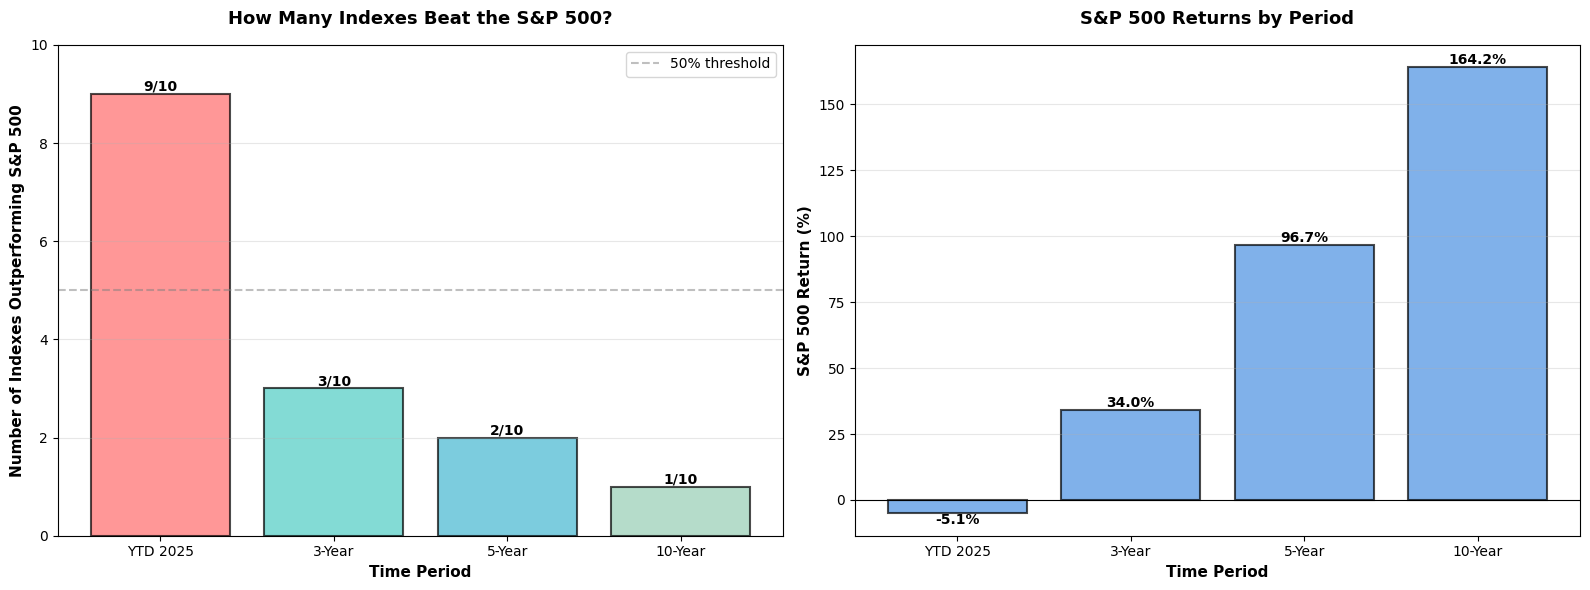


TREND INSIGHTS:
✗ The YTD trend DIFFERS from the 3-year trend
⚠ More indexes are outperforming recently compared to the long-term

Key Observations:
- YTD 2025: 9 indexes outperform
- 3-Year: 3 indexes outperform
- 5-Year: 2 indexes outperform
- 10-Year: 1 indexes outperform


In [10]:


# ============================================
# PROMPT 10: Trend Analysis and Visualization
# ============================================

print("\n" + "="*80)
print("TREND ANALYSIS: YTD vs LONG-TERM PERFORMANCE")
print("="*80 + "\n")

# Add YTD to comparison summary
ytd_outperformers = len(outperformers)
comparison_summary.insert(0, {
    'Period': 'YTD 2025',
    'S&P 500 Return (%)': sp500_return,
    'Outperformers': ytd_outperformers,
    'Underperformers': 10 - ytd_outperformers
})

# Create summary DataFrame
summary_df = pd.DataFrame(comparison_summary)
print(summary_df.to_string(index=False))

# Visualize the trend
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Number of outperformers by period
ax1 = axes[0]
colors_chart = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = ax1.bar(summary_df['Period'], summary_df['Outperformers'],
               color=colors_chart, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.axhline(y=5, color='gray', linestyle='--', alpha=0.5, label='50% threshold')
ax1.set_ylabel('Number of Indexes Outperforming S&P 500', fontsize=11, fontweight='bold')
ax1.set_xlabel('Time Period', fontsize=11, fontweight='bold')
ax1.set_title('How Many Indexes Beat the S&P 500?', fontsize=13, fontweight='bold', pad=15)
ax1.set_ylim(0, 10)
ax1.grid(axis='y', alpha=0.3)
ax1.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}/10',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

# Chart 2: S&P 500 returns by period
ax2 = axes[1]
bars2 = ax2.bar(summary_df['Period'], summary_df['S&P 500 Return (%)'],
                color='#4A90E2', alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.set_ylabel('S&P 500 Return (%)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Time Period', fontsize=11, fontweight='bold')
ax2.set_title('S&P 500 Returns by Period', fontsize=13, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom' if height > 0 else 'top',
            fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Print trend analysis
print("\n" + "="*80)
print("TREND INSIGHTS:")
print("="*80)

if ytd_outperformers == comparison_summary[1]['Outperformers']:
    print("✓ The YTD trend is CONSISTENT with the 3-year trend")
else:
    print("✗ The YTD trend DIFFERS from the 3-year trend")

# Check overall trend
outperformer_counts = [c['Outperformers'] for c in comparison_summary]
if len(set(outperformer_counts)) == 1:
    print("✓ The trend is PERFECTLY CONSISTENT across all time periods")
elif outperformer_counts[0] > outperformer_counts[-1]:
    print("⚠ More indexes are outperforming recently compared to the long-term")
elif outperformer_counts[0] < outperformer_counts[-1]:
    print("⚠ Fewer indexes are outperforming recently compared to the long-term")
else:
    print("⚠ The trend shows VARIATION across different time periods")

print("\nKey Observations:")
print(f"- YTD 2025: {ytd_outperformers} indexes outperform")
print(f"- 3-Year: {comparison_summary[1]['Outperformers']} indexes outperform")
print(f"- 5-Year: {comparison_summary[2]['Outperformers']} indexes outperform")
print(f"- 10-Year: {comparison_summary[3]['Outperformers']} indexes outperform")
print("="*80)



COMPREHENSIVE PERFORMANCE MATRIX



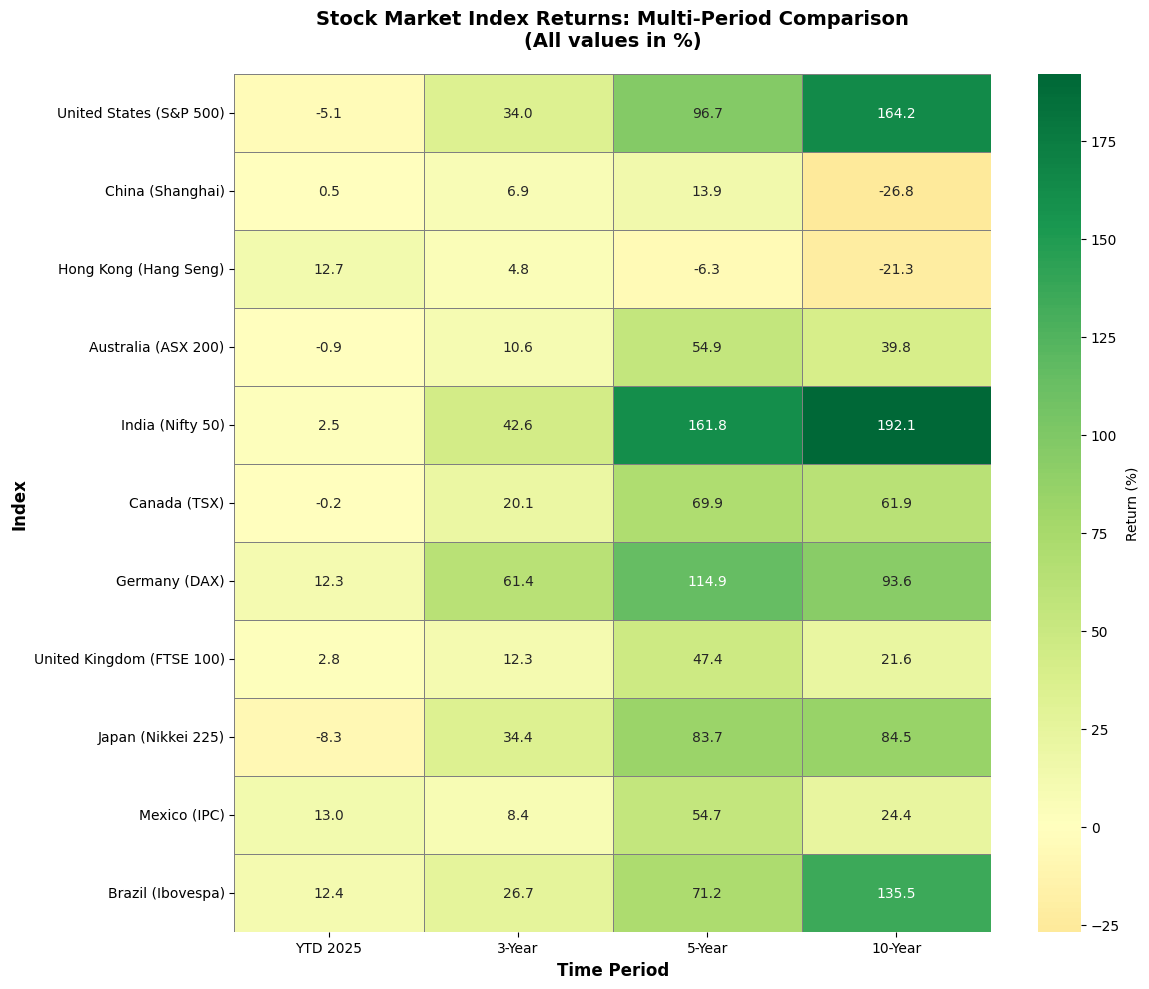


Comprehensive results exported to 'comprehensive_index_performance_2025.csv'


In [11]:

# ============================================
# PROMPT 11: Create Comprehensive Comparison Heatmap
# ============================================

print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE MATRIX")
print("="*80 + "\n")

# Create a matrix of all returns
all_periods = ['YTD 2025', '3-Year', '5-Year', '10-Year']
performance_matrix = []

for name in indexes.keys():
    row = {'Index': name}

    # Add YTD
    row['YTD 2025'] = ytd_returns.get(name)

    # Add long-term periods
    for period in ['3-Year', '5-Year', '10-Year']:
        row[period] = long_term_returns[period].get(name)

    performance_matrix.append(row)

perf_df = pd.DataFrame(performance_matrix)

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Prepare data for heatmap
heatmap_data = perf_df.set_index('Index')[all_periods]

# Create custom colormap
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Return (%)'}, linewidths=0.5, linecolor='gray',
            ax=ax)

ax.set_title('Stock Market Index Returns: Multi-Period Comparison\n(All values in %)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Time Period', fontsize=12, fontweight='bold')
ax.set_ylabel('Index', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Export comprehensive results
perf_df.to_csv('comprehensive_index_performance_2025.csv', index=False)
print("\nComprehensive results exported to 'comprehensive_index_performance_2025.csv'")